In [26]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point
import rtree
import pickle

from sklearn.model_selection import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import mean_squared_error
from catboost import Pool, CatBoostRegressor
import statsmodels.formula.api as sm
from sklearn.metrics import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns

from run_model import *
import gmaps
gmaps.configure(api_key=secret_key.google_api_key)

In [2]:
bike_df = load_pickle("storage/bike_df_final.pckl")

In [3]:
def clean_citibike(df):
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['Stop Time'] = pd.to_datetime(df['Stop Time'])
    
    df['DATE'] = df['Start Time'].dt.date
    
    df['day'] = df['Start Time'].dt.day
    df['month'] = df['Start Time'].dt.month
    df['year'] = df['Start Time'].dt.year
    
    df['day_of_week_name'] = df['Start Time'].dt.weekday_name
    df['day_of_week'] = df['Start Time'].dt.weekday
    
    df['time_of_day'] = df['Start Time'].dt.hour
    df["bin_time_of_day"] = df["Start Time"].apply(bin_time)
    
    grp = df.groupby(['Start Station Name', 'DATE', 'time_of_day'])
    
    df = grp['Bike ID'].count().reset_index()
    df = df.rename(index=str, columns={'Bike ID': "target"})
    
    df = pd.merge(df, bik_loc, on='Start Station Name', how="left")
    
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    df['day'] = df['DATE'].dt.day
    df['month'] = df['DATE'].dt.month
    df['year'] = df['DATE'].dt.year
    
    df['day_of_week_name'] = df['DATE'].dt.weekday_name
    df['day_of_week'] = df['DATE'].dt.weekday
    
    df['log_target'] = df['target'].apply(lambda x: np.log(x))
    
    return df

In [5]:
bik_loc = bike_df.groupby(["Start Station Name", "Start Station Latitude", "Start Station Longitude"])['Bike ID'].count().reset_index()
bik_loc = bik_loc.drop("Bike ID", axis=1)

In [7]:
bike_df = clean_citibike(bike_df)

Text(0,0.5,'Number of Users')

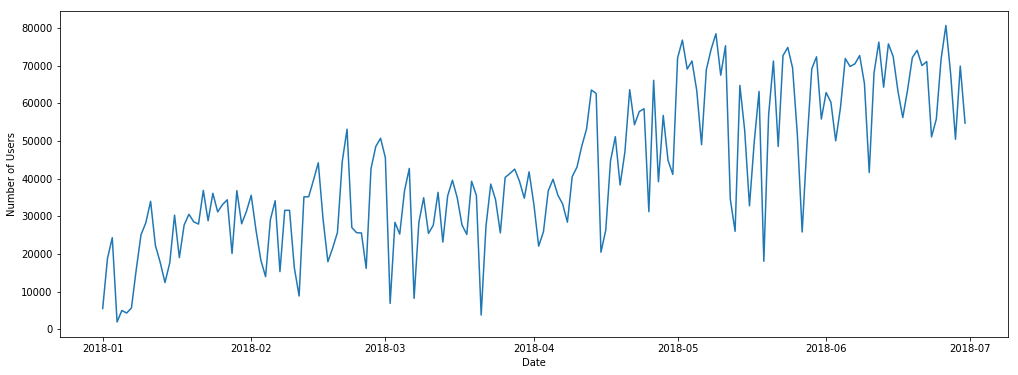

In [25]:
eda = bike_df.groupby("DATE")['target'].sum().reset_index()
fig = plt.figure(figsize=(17,6))
plt.plot(eda['DATE'], eda['target']);
plt.xlabel("Date")
plt.ylabel("Number of Users")

In [27]:
mta_loc.shape

(460, 6)

In [28]:
eda = bike_df.groupby("DATE")['target'].mean().reset_index()

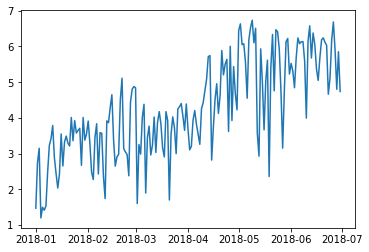

In [30]:
plt.plot(eda['DATE'], eda['target'])